<center/><h1/><strong/>Simple linear regression : 

#Introduction :

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables: One variable, denoted x (Dependent variable) in relation with the independent variable denoted y.

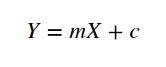

#Loss function:

The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:



1.   Find the difference between the actual y and predicted y value(y = mx + c), for a given x.
2.   Square this difference.
3. Find the mean of the squares for every value in X.





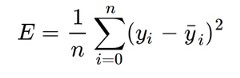

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:


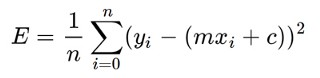

So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("/content/Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

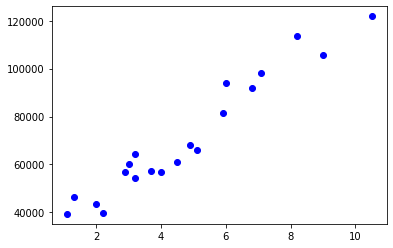

In [6]:
plt.scatter(X_train,y_train,color="blue")

#Gradient Descent

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.

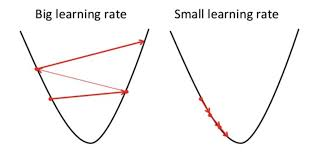



1.   Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
2.   Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D



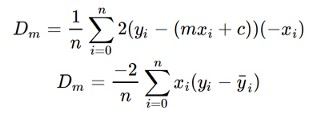

Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :


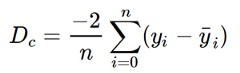

 Now we update the current value of m and c using the following equation:

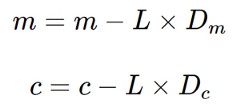

 We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

In [7]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X
Loss_function=[]
# Performing Gradient Descent 
for i in range(epochs):
    Y_pred = m*X_train + c  # The current predicted value of Y
    D_m = (-2/n) * np.sum(X_train * (y_train- Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    Loss_function.append((1/n)*np.sum(np.power(y_train-(m*X_train+c),2)))
print(m,c)
    


4810.92049510021 41973.53642144689


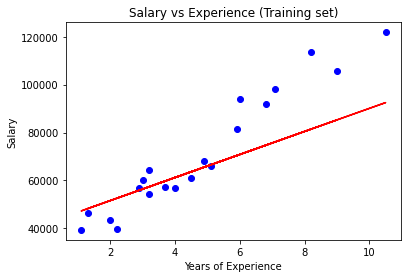

In [8]:
y_predict=m*X_train+c
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,y_predict,color="red")
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


Text(0, 0.5, 'Loss function')

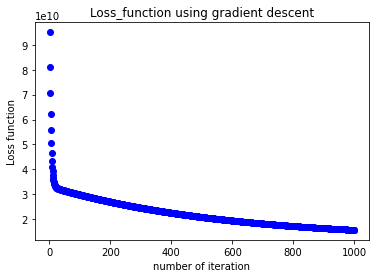

In [9]:
iter=np.linspace(1,epochs,epochs)#number of iterations
plt.scatter(iter,Loss_function,color="blue")
plt.title("Loss_function using gradient descent")
plt.xlabel("number of iteration")
plt.ylabel("Loss function")

## Scikit-learn for machine learning

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)

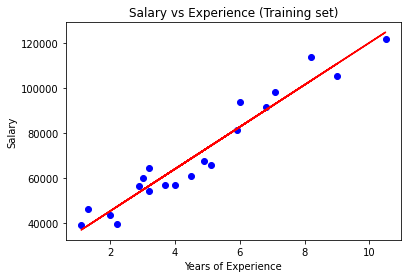

In [12]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

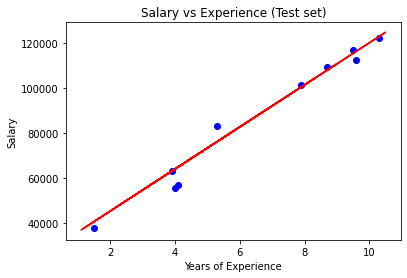

In [13]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Evaluation

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE:')
print('train set',mean_squared_error(y_train, regressor.predict(X_train)))
print('test set',mean_squared_error(y_test, regressor.predict(X_test)))

print('R²:')
print('train set',r2_score(y_train, regressor.predict(X_train)))
print('test set',r2_score(y_test, regressor.predict(X_test)))


MSE:
train set 36852948.76438455
test set 21026037.329511296
R²:
train set 0.9381900012894278
test set 0.9749154407708353


#What you can do : 


1.   Check scikit-learn documentation : https://scikit-learn.org/stable/
2.   Use different learning rates, number of iterations and parameter initialization and see if you get better results.

